In [2]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

# Specify the path to your dataset
data_path = '/content/drive/MyDrive/churn_data/BankChurners.csv'  # Adjust the path as needed

# Load the dataset
data = pd.read_csv(data_path)

# Check the first few rows of the dataset
print(data.head())

   clientnum  churn  customer_age gender  dependent_count education_level  \
0  768805383      0            45      M                3     High School   
1  818770008      0            49      F                5        Graduate   
2  713982108      0            51      M                3        Graduate   
3  769911858      0            40      F                4     High School   
4  709106358      0            40      M                3      Uneducated   

  marital_status income_category card_category  months_on_book  ...  \
0        Married     $60K - $80K          Blue              39  ...   
1         Single  Less than $40K          Blue              44  ...   
2        Married    $80K - $120K          Blue              36  ...   
3        Unknown  Less than $40K          Blue              34  ...   
4        Married     $60K - $80K          Blue              21  ...   

   credit_limit  total_revolving_bal  avg_open_to_buy  total_amt_chng_q4_q1  \
0       12691.0                

In [5]:
import os

# Specify the directory where your datasets are located
data_dir = '/content/drive/MyDrive/churn_data'

# List all CSV files in the directory
dataset_files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]
print(dataset_files)

['subscription_service_train.csv', 'E Commerce Dataset.csv', 'Telco-Customer-Churn.csv', 'Customertravel.csv', 'orange_telecom.csv', 'internet_service_churn.csv', 'Bank_churn.csv', 'churn-bigml-80.csv', 'telecom_churn.csv', 'ecom-user-churn-data.csv', 'BankChurners.csv']


In [29]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

data_dir = '/content/drive/MyDrive/churn_data'
dataset_files = [f for f in os.listdir(data_dir) if f.endswith('.csv')][:3]
all_data = {}

for file in dataset_files:
    data = pd.read_csv(os.path.join(data_dir, file))

    print(f"Processing {file}: {data.shape}")

    # Convert object columns to numeric, if possible
    for col in data.select_dtypes(include=['object']).columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')

    # Handle missing values
    data.fillna(data.mean(), inplace=True)  # Fill numeric NaNs with mean
    # Drop rows where the target variable is NaN, if applicable
    if 'churn' in data.columns:
        data = data[data['churn'].notna()]

    # Encode categorical variables
    data = pd.get_dummies(data, drop_first=True)

    # Specify the target variable
    target = 'churn'
    if target not in data.columns:
        print(f"Target column '{target}' not found in {file}. Skipping this dataset.")
        continue

    # Randomly sample 20% of the data
    if data.shape[0] > 0:
        sampled_data = data.sample(frac=0.2, random_state=42)
    else:
        print(f"No data available for sampling in {file}. Skipping.")
        continue

    X = sampled_data.drop(columns=[target])
    y = sampled_data[target]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Store the processed data
    all_data[file] = {
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test
    }

print("Processed datasets:")
for filename, dataset in all_data.items():
    print(f"{filename}: Train size = {dataset['X_train'].shape}, Test size = {dataset['X_test'].shape}")






Processing subscription_service_train.csv: (243787, 21)
Processing E Commerce Dataset.csv: (5630, 20)
Processing Telco-Customer-Churn.csv: (7043, 21)
Processed datasets:
subscription_service_train.csv: Train size = (39005, 20), Test size = (9752, 20)
E Commerce Dataset.csv: Train size = (900, 19), Test size = (226, 19)
Telco-Customer-Churn.csv: Train size = (1127, 20), Test size = (282, 20)


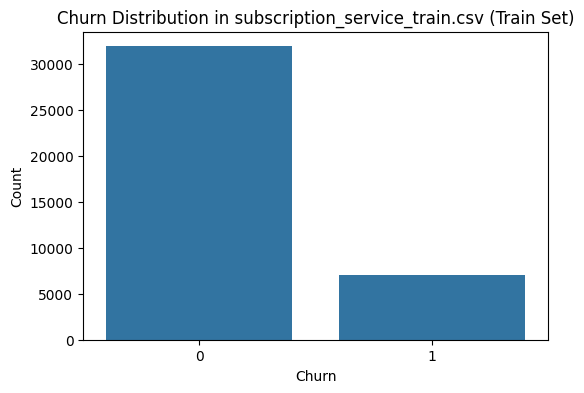

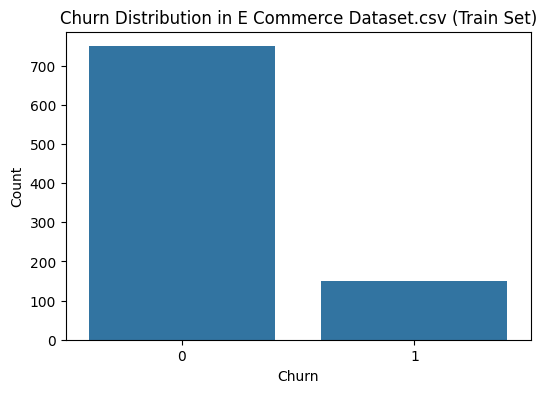

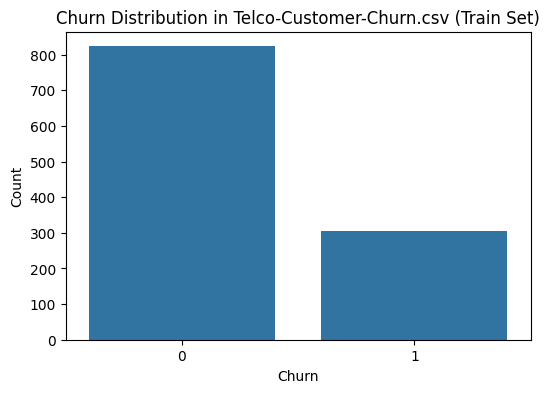

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

for file, dataset in all_data.items():
    plt.figure(figsize=(6, 4))
    sns.countplot(x=dataset['y_train'])
    plt.title(f'Churn Distribution in {file} (Train Set)')
    plt.xlabel('Churn')
    plt.ylabel('Count')
    plt.show()

NaN or infinite values found in subscription_service_train.csv. Replacing them...
Numeric features in subscription_service_train.csv:
         accountage  monthlycharges  totalcharges  viewinghoursperweek  \
count  39005.000000    39005.000000  39005.000000         39005.000000   
mean      59.988130       12.462054    746.841845            20.558605   
std       34.299879        4.337888    521.061944            11.235750   
min        1.000000        4.990126      5.108220             1.001135   
25%       30.000000        8.699888    327.867783            10.830715   
50%       60.000000       12.462534    648.157222            20.712095   
75%       90.000000       16.241605   1081.978734            30.196606   
max      119.000000       19.989364   2373.700290            39.999168   

       averageviewingduration  contentdownloadspermonth    userrating  \
count            39005.000000              39005.000000  39005.000000   
mean                92.088053                 24.4765

<Figure size 1500x1000 with 0 Axes>

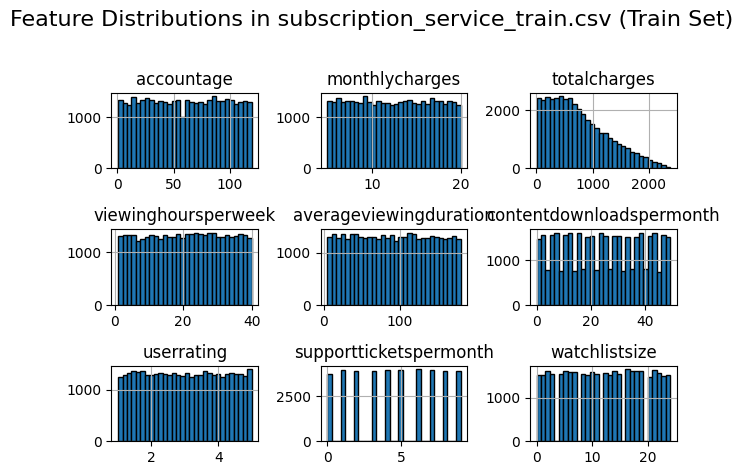

NaN or infinite values found in E Commerce Dataset.csv. Replacing them...
Numeric features in E Commerce Dataset.csv:
           tenure    citytier  warehousetohome  hourspendonapp  \
count  900.000000  900.000000       900.000000      900.000000   
mean    10.058918    1.645556        15.582663        2.921478   
std      8.035254    0.914554         8.147335        0.704849   
min      0.000000    1.000000         6.000000        1.000000   
25%      3.000000    1.000000         9.000000        2.000000   
50%      9.000000    1.000000        14.000000        3.000000   
75%     15.000000    3.000000        20.000000        3.000000   
max     31.000000    3.000000        36.000000        4.000000   

       numberofdeviceregistered  satisfactionscore  numberofaddress  \
count                900.000000         900.000000       900.000000   
mean                   3.681111           3.097778         4.222222   
std                    1.039530           1.379734         2.618399   
min

<Figure size 1500x1000 with 0 Axes>

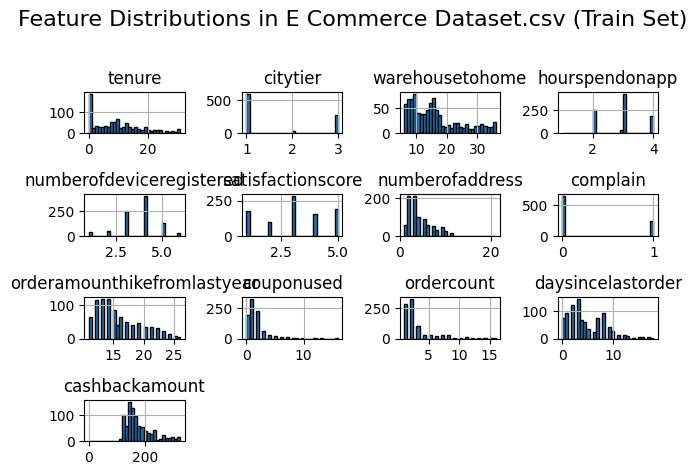

NaN or infinite values found in Telco-Customer-Churn.csv. Replacing them...
Numeric features in Telco-Customer-Churn.csv:
       seniorcitizen       tenure  monthlycharges  totalcharges
count    1127.000000  1127.000000     1127.000000   1127.000000
mean        0.165927    32.298137       64.082387   2235.252972
std         0.372180    25.106237       30.180370   2277.173512
min         0.000000     1.000000       18.700000     18.900000
25%         0.000000     8.000000       33.950000    352.775000
50%         0.000000    28.000000       69.750000   1311.750000
75%         0.000000    56.000000       89.450000   3734.700000
max         1.000000    72.000000      118.750000   8672.450000


<Figure size 1500x1000 with 0 Axes>

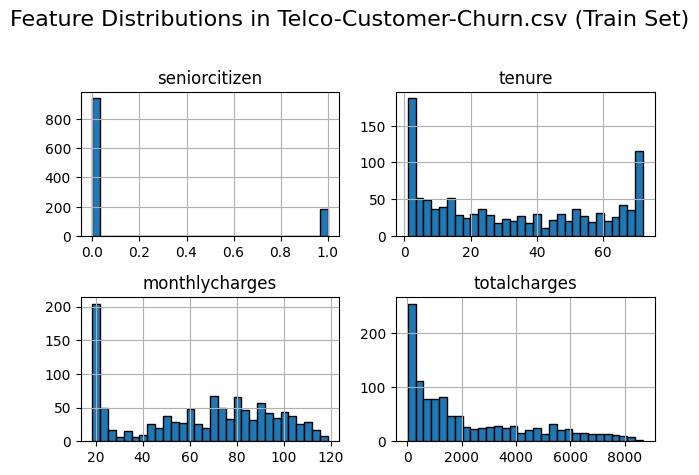

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Visualize Feature Distributions
for file, dataset in all_data.items():
    # Select only numeric features
    X_train_clean = dataset['X_train'].select_dtypes(include='number')

    # Drop non-meaningful columns like customerid
    X_train_clean = X_train_clean.drop(columns=['customerid'], errors='ignore')

    # Check for NaNs and infinite values
    if X_train_clean.isnull().values.any() or (X_train_clean == float('inf')).any().any():
        print(f"NaN or infinite values found in {file}. Replacing them...")
        X_train_clean.replace([np.inf, -np.inf], np.nan, inplace=True)
        X_train_clean.fillna(X_train_clean.mean(), inplace=True)  # Fill NaNs with the mean

    # Remove columns that are completely NaN
    X_train_clean = X_train_clean.dropna(axis=1, how='all')

    # Check for empty DataFrame
    if X_train_clean.empty:
        print(f"No numeric features to plot in {file}.")
        continue

    print(f"Numeric features in {file}:")
    print(X_train_clean.describe())

    # Plot histograms for each numeric feature
    plt.figure(figsize=(15, 10))
    X_train_clean.hist(bins=30, edgecolor='black')
    plt.suptitle(f'Feature Distributions in {file} (Train Set)', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the suptitle
    plt.show()




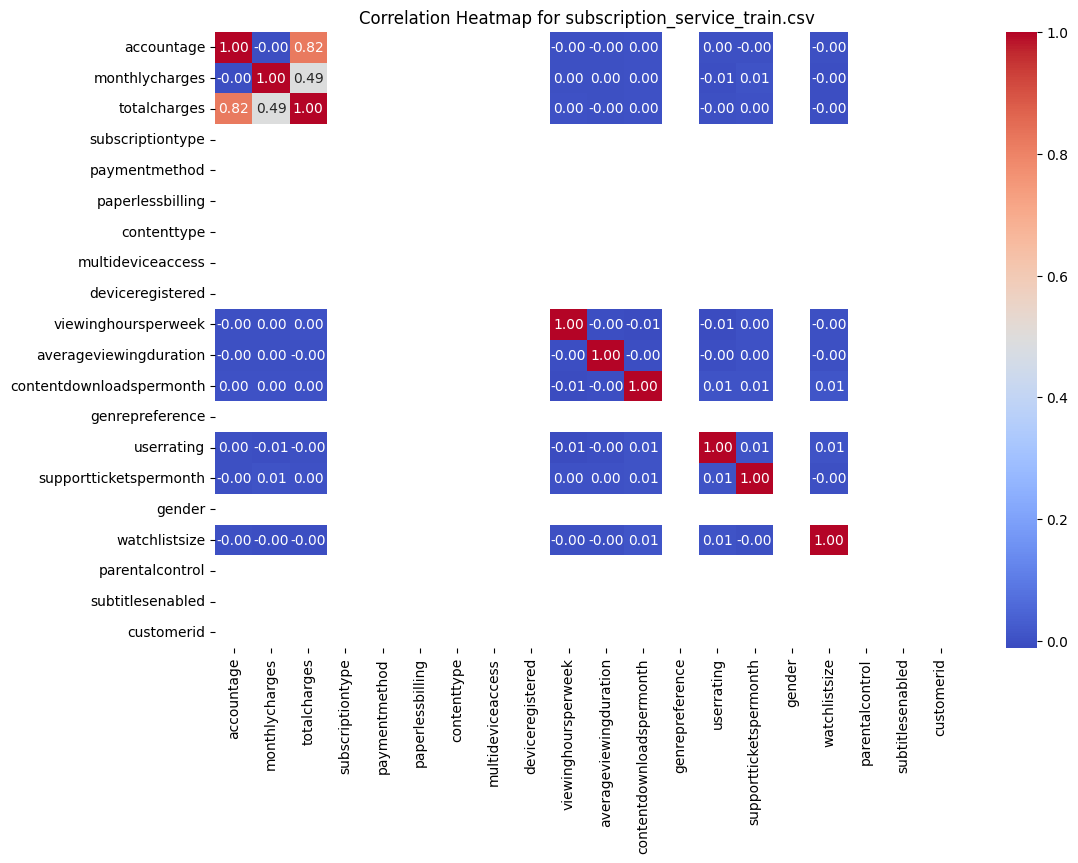

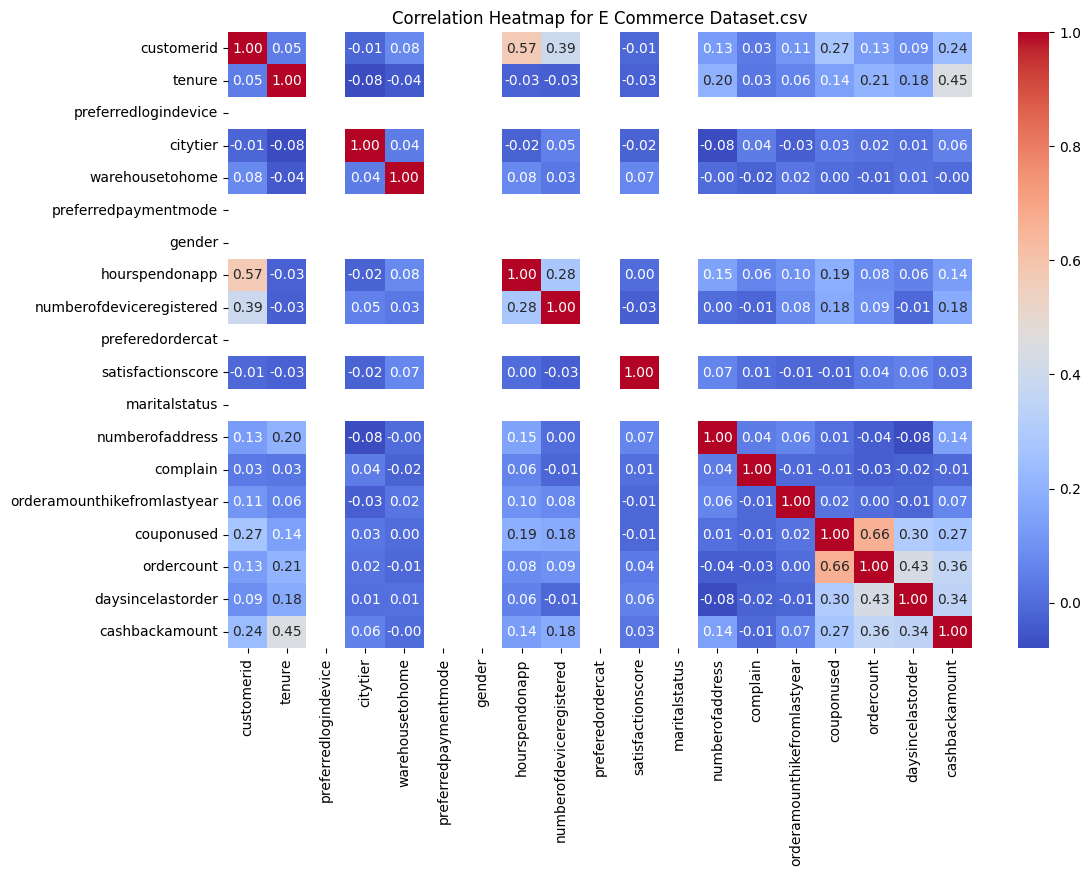

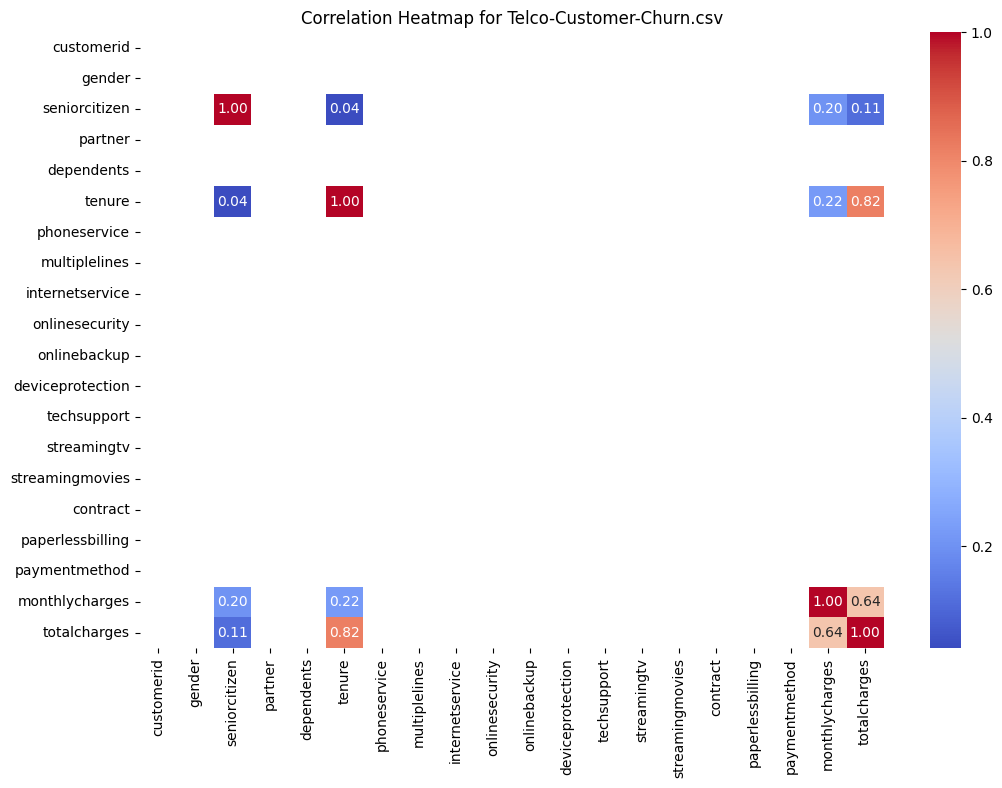

In [32]:
for file, dataset in all_data.items():
    plt.figure(figsize=(12, 8))
    sns.heatmap(dataset['X_train'].corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'Correlation Heatmap for {file}')
    plt.show()

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer

# Example: Training a logistic regression model for each dataset
for file, dataset in all_data.items():
    X_train, X_test, y_train, y_test = dataset['X_train'], dataset['X_test'], dataset['y_train'], dataset['y_test']

    # Check if training data is available
    if X_train.shape[0] == 0 or y_train.shape[0] == 0:
        print(f"No training data available for {file}. Skipping model fitting.")
        continue

    # Create an imputer for filling missing values
    imputer = SimpleImputer(strategy='mean')  # or use 'median', 'most_frequent', etc.

    # Fit and transform the training data
    X_train_imputed = imputer.fit_transform(X_train)
    # Transform the test data
    X_test_imputed = imputer.transform(X_test)

    try:
        model = LogisticRegression(max_iter=1000)
        model.fit(X_train_imputed, y_train)
        y_pred = model.predict(X_test_imputed)

        print(f"Classification report for {file}:")
        print(classification_report(y_test, y_pred))
    except Exception as e:
        print(f"Error processing {file}: {e}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicte

Classification report for subscription_service_train.csv:
              precision    recall  f1-score   support

           0       0.83      1.00      0.90      8047
           1       0.00      0.00      0.00      1705

    accuracy                           0.83      9752
   macro avg       0.41      0.50      0.45      9752
weighted avg       0.68      0.83      0.75      9752

Classification report for E Commerce Dataset.csv:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       192
           1       0.69      0.32      0.44        34

    accuracy                           0.88       226
   macro avg       0.79      0.65      0.69       226
weighted avg       0.86      0.88      0.86       226

Classification report for Telco-Customer-Churn.csv:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       213
           1       0.59      0.51      0.55        69

    accuracy          

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight

# Example: Training a logistic regression model for each dataset
for file, dataset in all_data.items():
    X_train, X_test, y_train, y_test = dataset['X_train'], dataset['X_test'], dataset['y_train'], dataset['y_test']

    # Check if training data is available
    if X_train.shape[0] == 0 or y_train.shape[0] == 0:
        print(f"No training data available for {file}. Skipping model fitting.")
        continue

    # Create an imputer for filling missing values
    imputer = SimpleImputer(strategy='mean')

    # Fit and transform the training data
    X_train_imputed = imputer.fit_transform(X_train)
    # Transform the test data
    X_test_imputed = imputer.transform(X_test)

    # Scale the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_imputed)
    X_test_scaled = scaler.transform(X_test_imputed)

    # Compute class weights
    class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

    try:
        model = LogisticRegression(max_iter=2000, class_weight=class_weight_dict)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

        print(f"Classification report for {file}:")
        print(classification_report(y_test, y_pred))
    except Exception as e:
        print(f"Error processing {file}: {e}")


Classification report for subscription_service_train.csv:
              precision    recall  f1-score   support

           0       0.83      1.00      0.90      8047
           1       0.00      0.00      0.00      1705

    accuracy                           0.83      9752
   macro avg       0.41      0.50      0.45      9752
weighted avg       0.68      0.83      0.75      9752

Classification report for E Commerce Dataset.csv:
              precision    recall  f1-score   support

           0       0.95      0.76      0.84       192
           1       0.36      0.76      0.49        34

    accuracy                           0.76       226
   macro avg       0.65      0.76      0.66       226
weighted avg       0.86      0.76      0.79       226

Classification report for Telco-Customer-Churn.csv:
              precision    recall  f1-score   support

           0       0.90      0.69      0.78       213
           1       0.44      0.75      0.56        69

    accuracy          

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
from sklearn.model_selection import GridSearchCV

# Define the model
model = LogisticRegression(max_iter=1000, class_weight='balanced')

# Set up the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Set up the grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1_macro')

# Fit the grid search
grid_search.fit(X_train_scaled, y_train)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

# Use the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))


Best parameters found:  {'C': 0.01, 'solver': 'saga'}
              precision    recall  f1-score   support

           0       0.90      0.70      0.79       213
           1       0.45      0.75      0.57        69

    accuracy                           0.72       282
   macro avg       0.68      0.73      0.68       282
weighted avg       0.79      0.72      0.73       282

